Проект по ML с Python (зимен семестър 2023/2024) <br/>
Роберт Борисов 62529, Владимир Радев 62530 <br/>
dataset: **Credit Card Dataset for Clustering** <br/>

**Описание на проекта**

Технологиите, които ще използваме за този проект са **Python** и **Jupyter**</br>
Проектът ни е от тип **A**(Избрани са данни от **Kaggle** за клъстеразиционна задача)</br>
По проекта е работено едновременно от дватама(Събиране на едно място,генериране на идея и кодене)


**1.Запознаване с dataseta**

*This dataset belongs to a financial intituition and contains an extensive data on their customers based on their purchasing patterns over past few years . The institution wants to launch a targeted campaign based on the way their customers are divided . We need to find that 'criteria' for division*

DETAILS OF DATASET

1) CUSTID : Identification number of credit card holder

2) BALANCE : Balancing amount left in customer's account

3) BALANCE_FREQUENCY : Frequency of updating balance in account . Score in between 0 and 1 . (0 : not updated frequently and 1 : updated frequently)

4) PURCHASES : Amount of purchases made

5) ONEOFFPURCHASES : Maximum purchases in one go

6) INSTALLMENTS_PURCHASES : Amount of purchase done in one installments

7) CASH_ADVANCE : Cash payments made in advance by the customer

8) PURCHASES_FREQUENCY : Frequency of making purchases .(0 : no purchases and 1 : maximum purchases)

9) ONEOFF_PURCHASES_FREQUENCY : Tells how frequently the purchases are made in one go . (0 : no purchases in one go and 1 : maximum purchases in one go)

10) PURCHASES_INSTALLMENTS_FREQUENCY : frequency of making purchases with installments

11) CASH_ADVANCE_FREQUENCY : frequency of making cash payments in advance

12) CASH_ADVANCE_TRX : number of transactions made with providing cash in advanced

13) PURCHASES_TRX : number of purchases made in transactions

14) CREDIT_LIMIT : limit of the credit card user

15) PAYMENTS : amount of payment made by user

16) MINIMUM_PAYMENTS : least amount of payment made by the user

17) PRC_FULL_PAYMENT : Percentage of credit card payments made by the use in full amount

18) TENURE : time period for user's credit card service **

In [354]:
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

%matplotlib inline

In [355]:
data= pd.read_csv("./data/CC GENERAL.csv")
data.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [357]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [358]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**2.Редакция на данните**

**Преглед за Nan стойностите**

In [359]:
data_types = pd.DataFrame(data.dtypes,columns=["DataType"])

data_types["Unique Values"]=data.nunique()

data_types["Null Values"]=data.isnull().sum()

data_types["% null Values"]=data.isnull().sum()/len(data)

data_types.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='PuBu',axis=0)

Виждаме че MINIMUM_PAYMENTS има 313 липсващи стойности и Credit_LIMIT има една липсваща стойност

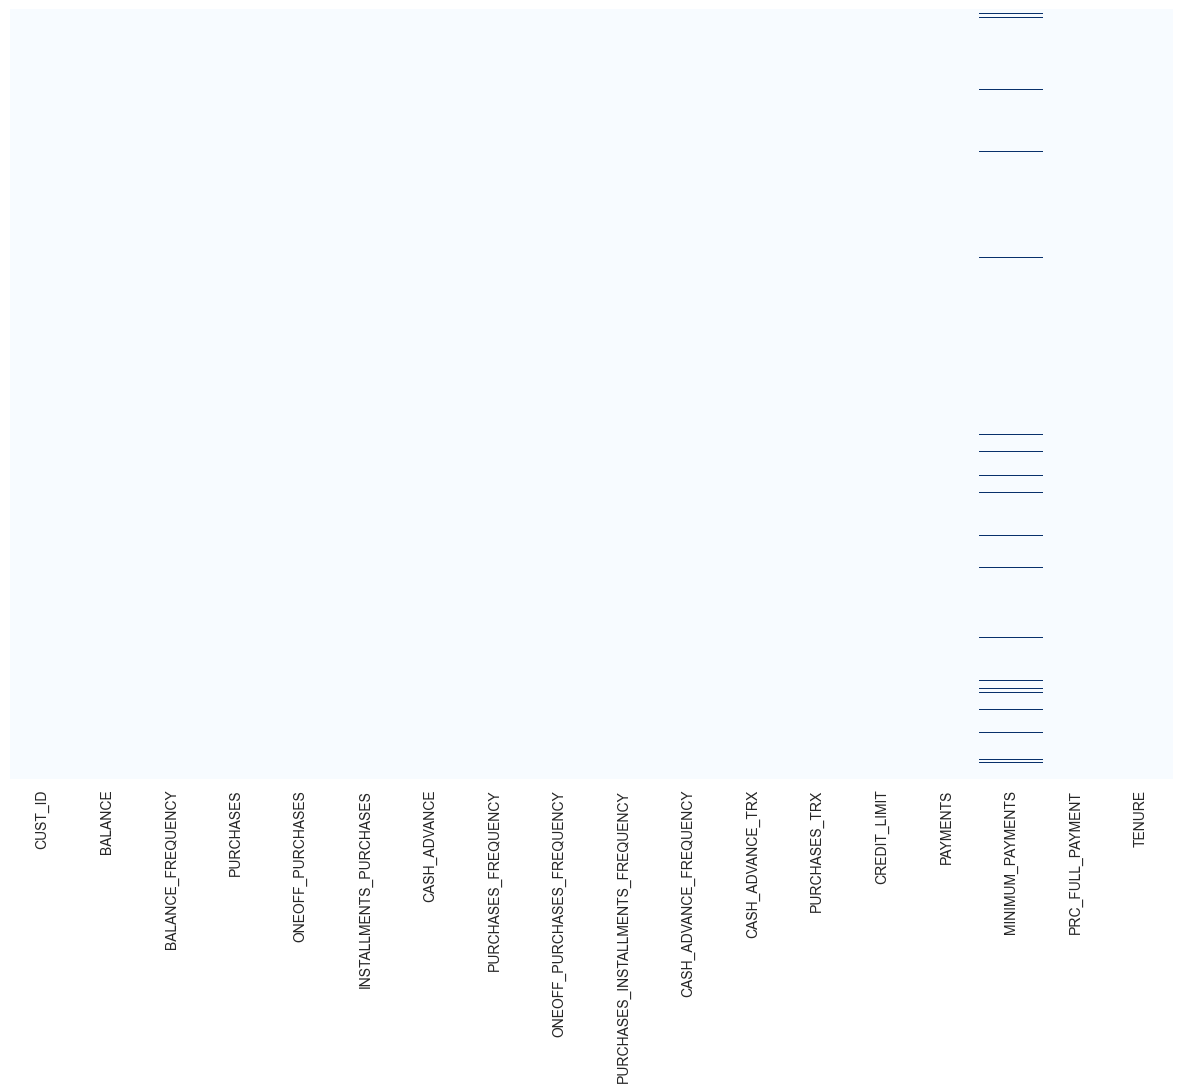

In [360]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(), yticklabels=False, cmap='Blues', cbar=False)
plt.show()

**Премахване на ненужните колони и запълване на липсващите стойности**

<li>CUST_ID представлява ид-то на конкретен картоносител. Но както видяхме от таблицата с липсващите стойности, в този конкретен датасет нямаме два еднакви реда носещи информация за един и същ картоносител, така че тази колона не ни трябва. Махаме я :</li>

In [361]:
data.drop(columns=['CUST_ID'],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<li>Тъй като данните ни съдържат липсващи стойности и ще правим клъстеризация , удобен подход е да използваме KNN Imputer , който ще запълни липсващите стойности с средното на n-те най-близки съседи до него</li>

In [362]:
from sklearn.impute import KNNImputer
columns_with_nulls = data.columns[data.isnull().any()].tolist()
imp = KNNImputer()
data_imp = pd.DataFrame(imp.fit_transform(data[columns_with_nulls]),columns=columns_with_nulls)
data.fillna(data_imp,inplace=True)
print(data[columns_with_nulls].isnull().sum())
print(data.info())


CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TR

**3.EDA**

Нека да проверим какво е разпределението на стойностите в колоните

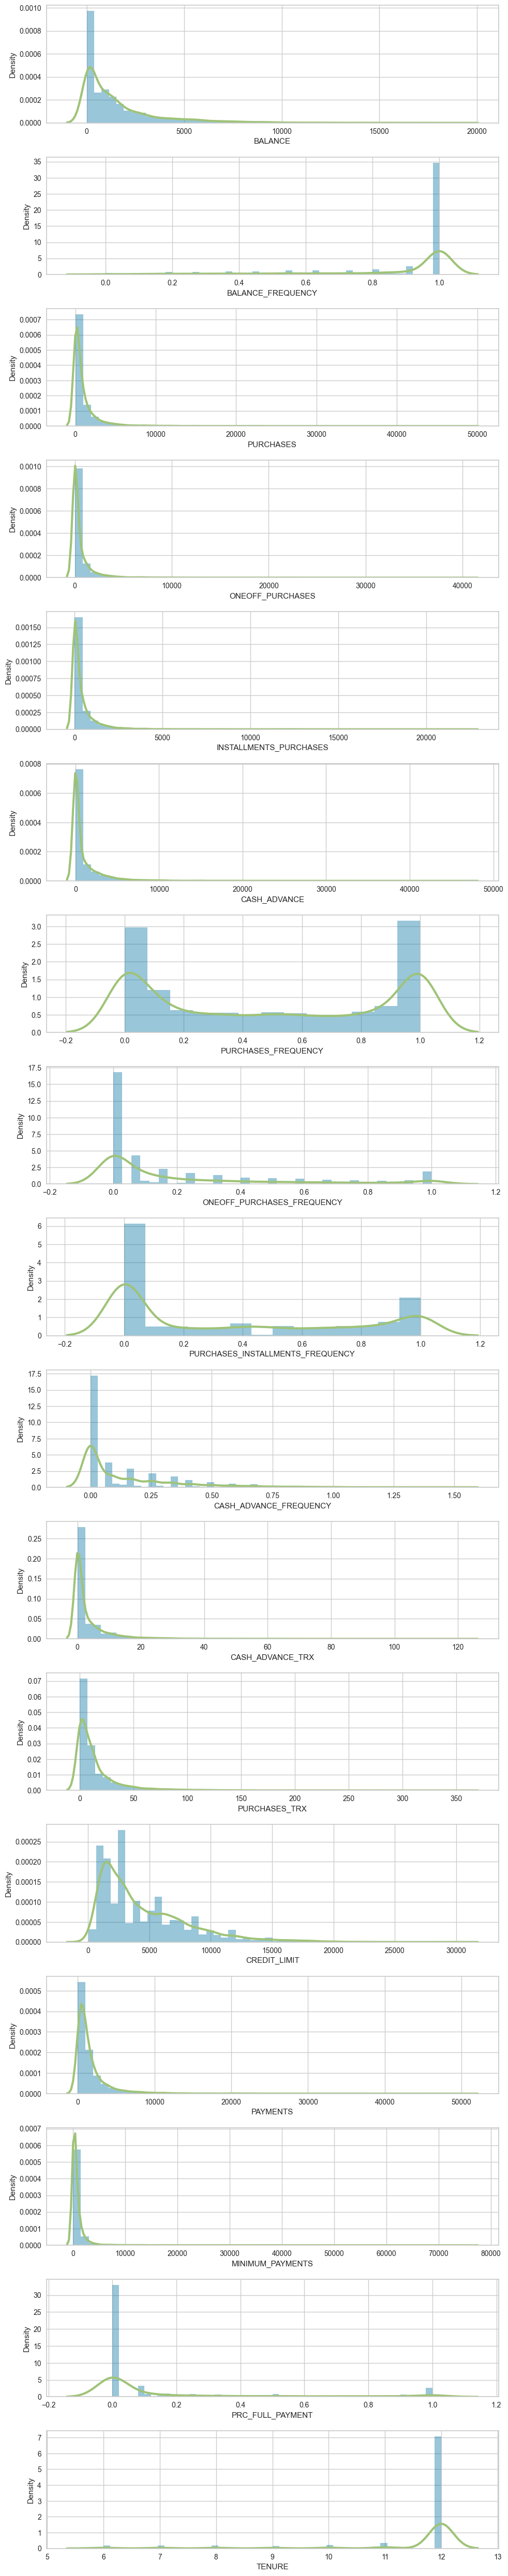

In [363]:
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize=(10, 50))
for i in range(len(data.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(data[data.columns[i]], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})

plt.tight_layout()
plt.show()

<li>Много от колоните имат стойности равни на нулата или близки до нея . Сега ако вземем колоните индикиращи някаква честота:</li>

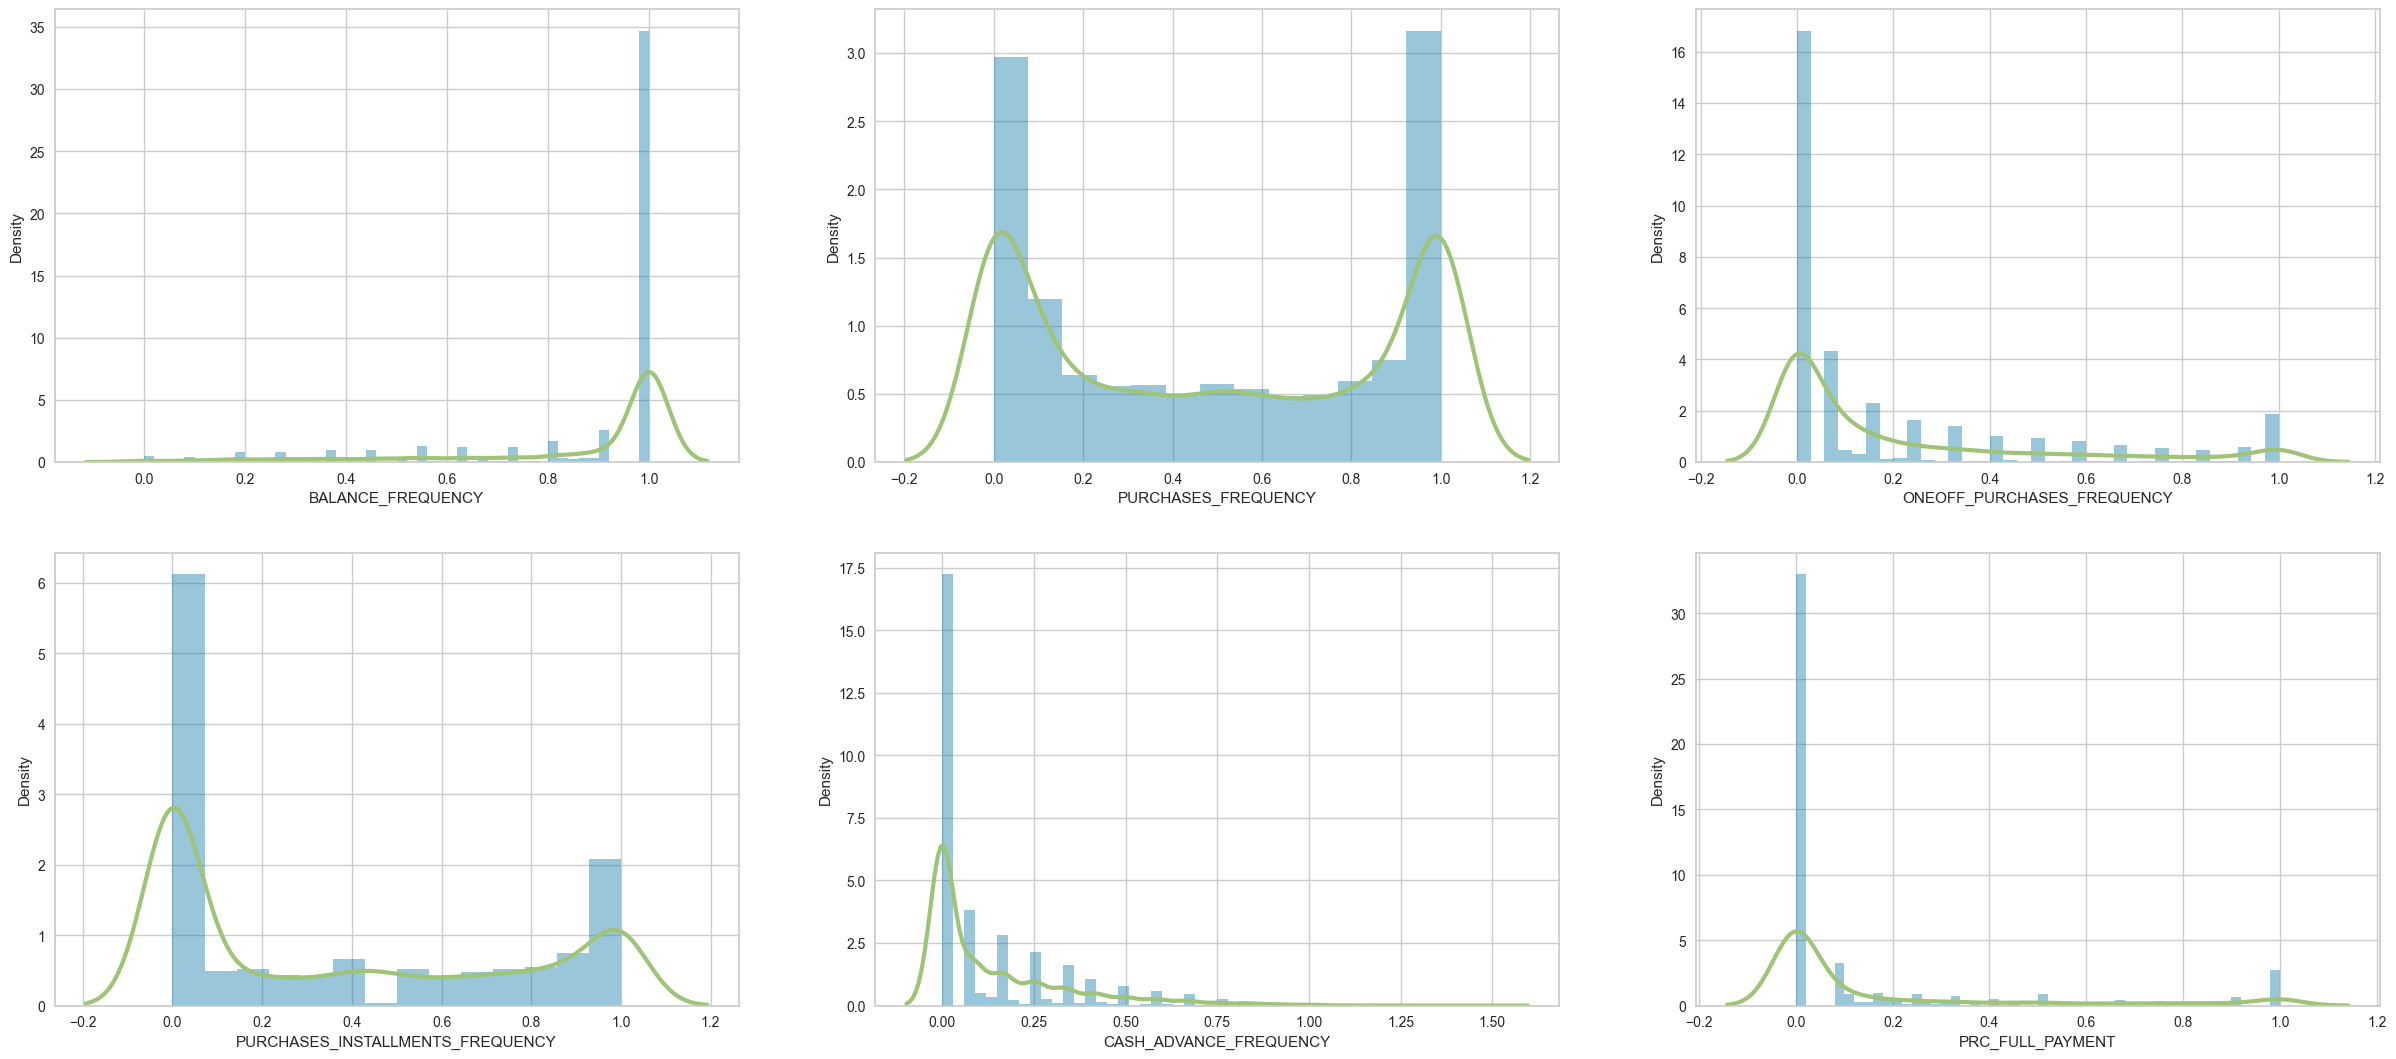

In [364]:
frequance_columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

plt.figure(figsize=(30,20))

for i, col in enumerate(data[frequance_columns]):

        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

<li>BALANCE_FREQUENCY изглежда че не следва тенденцията на другите колони и множеството от примерите са около 1цата</li>

<li>Също така PURCHASES_FREQUENCY има относително равномерно разпределение около 0та и 1цата </li>

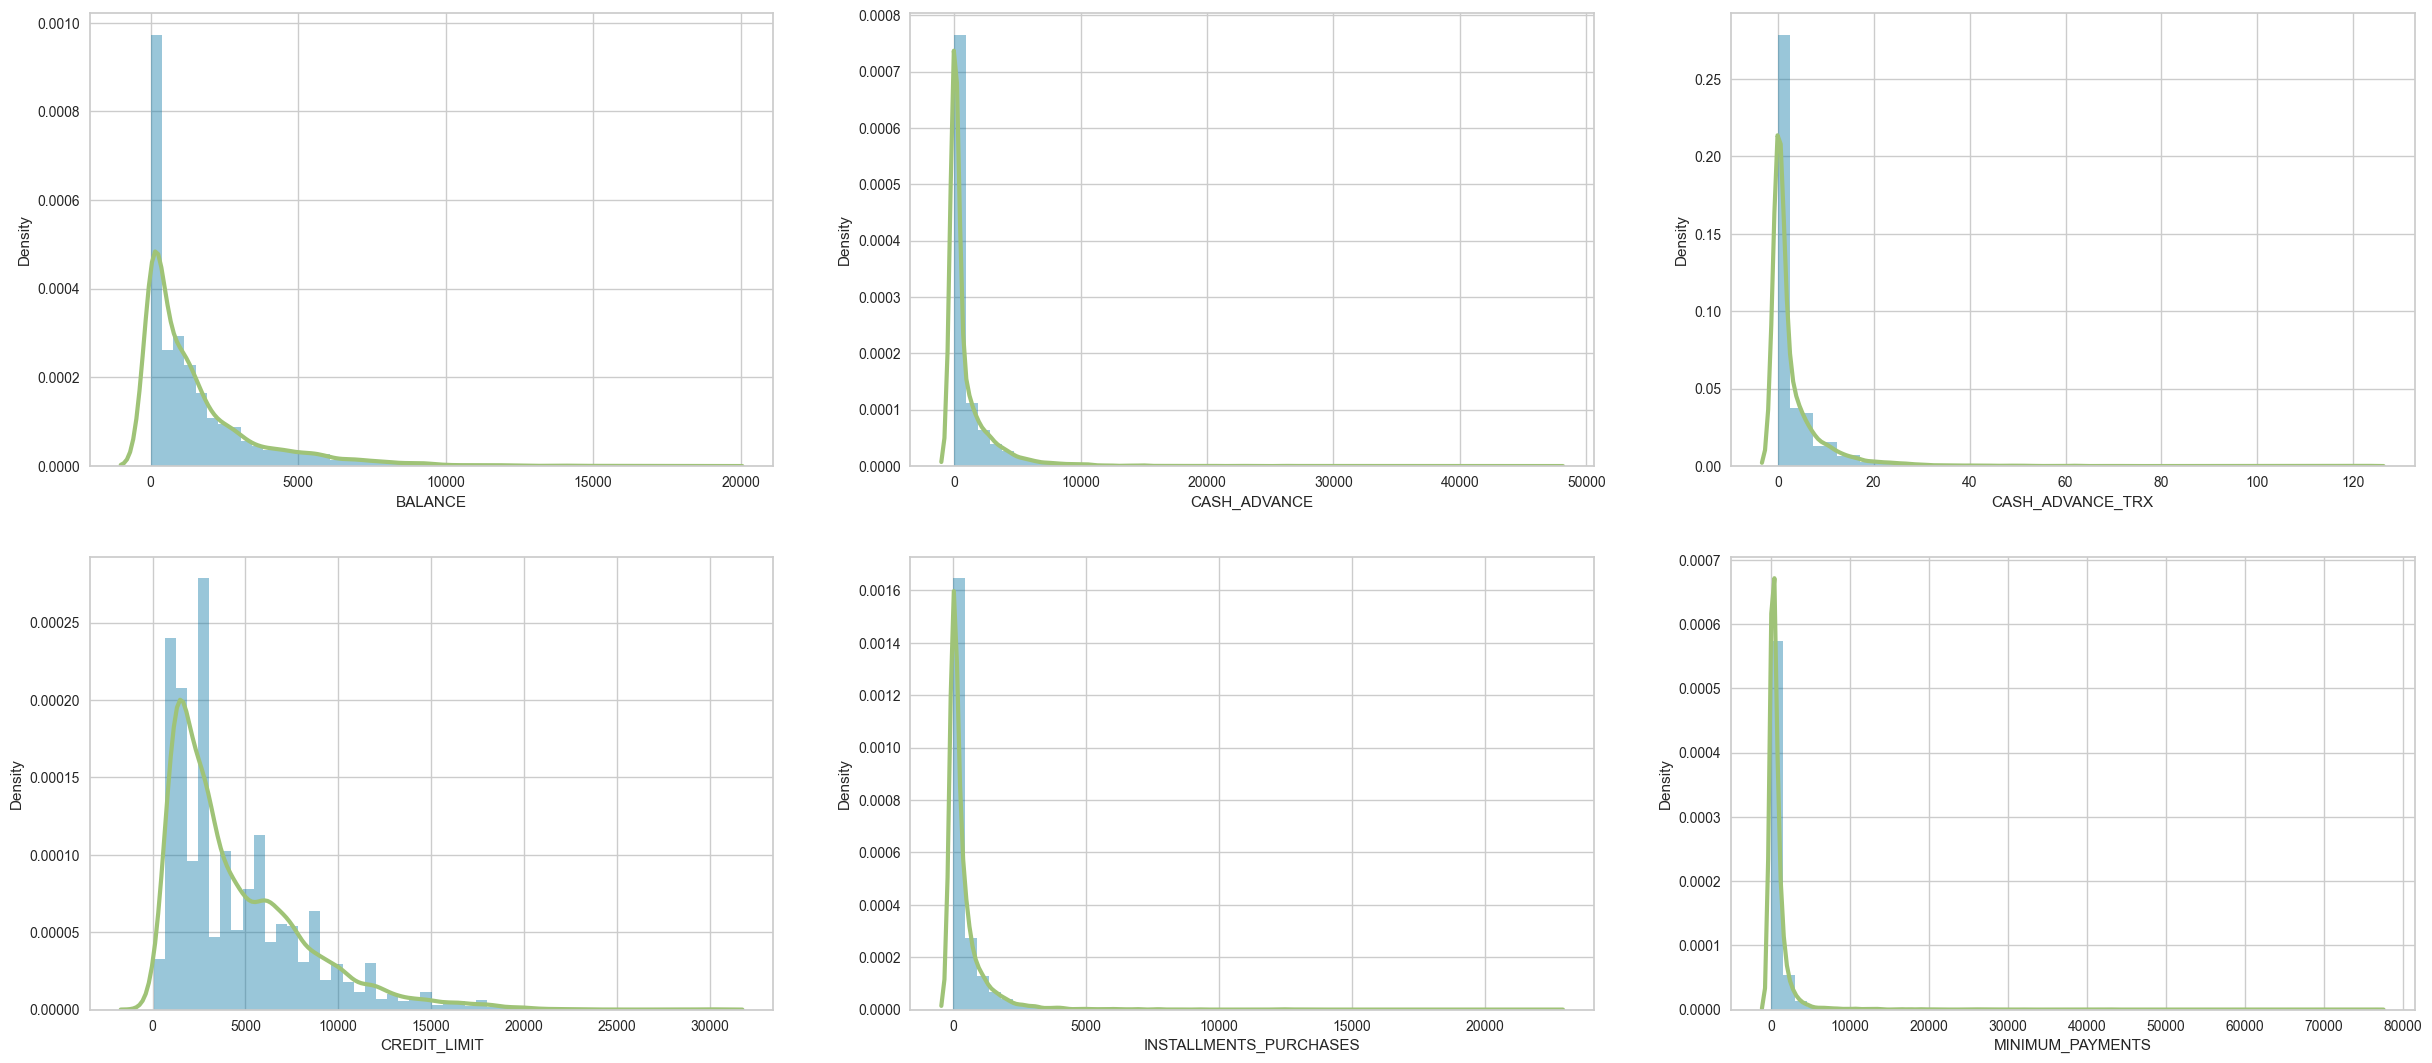

In [365]:
plt.figure(figsize=(30,20))

for i, col in enumerate(data.columns.difference(frequance_columns)[:6]):
        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

<li>Тези колони също следват тенденцията да са близо до 0лата, като BALANCE и CREDIT_LIMIT имат малко разнообразни стойности по-голями от 0лата</li>

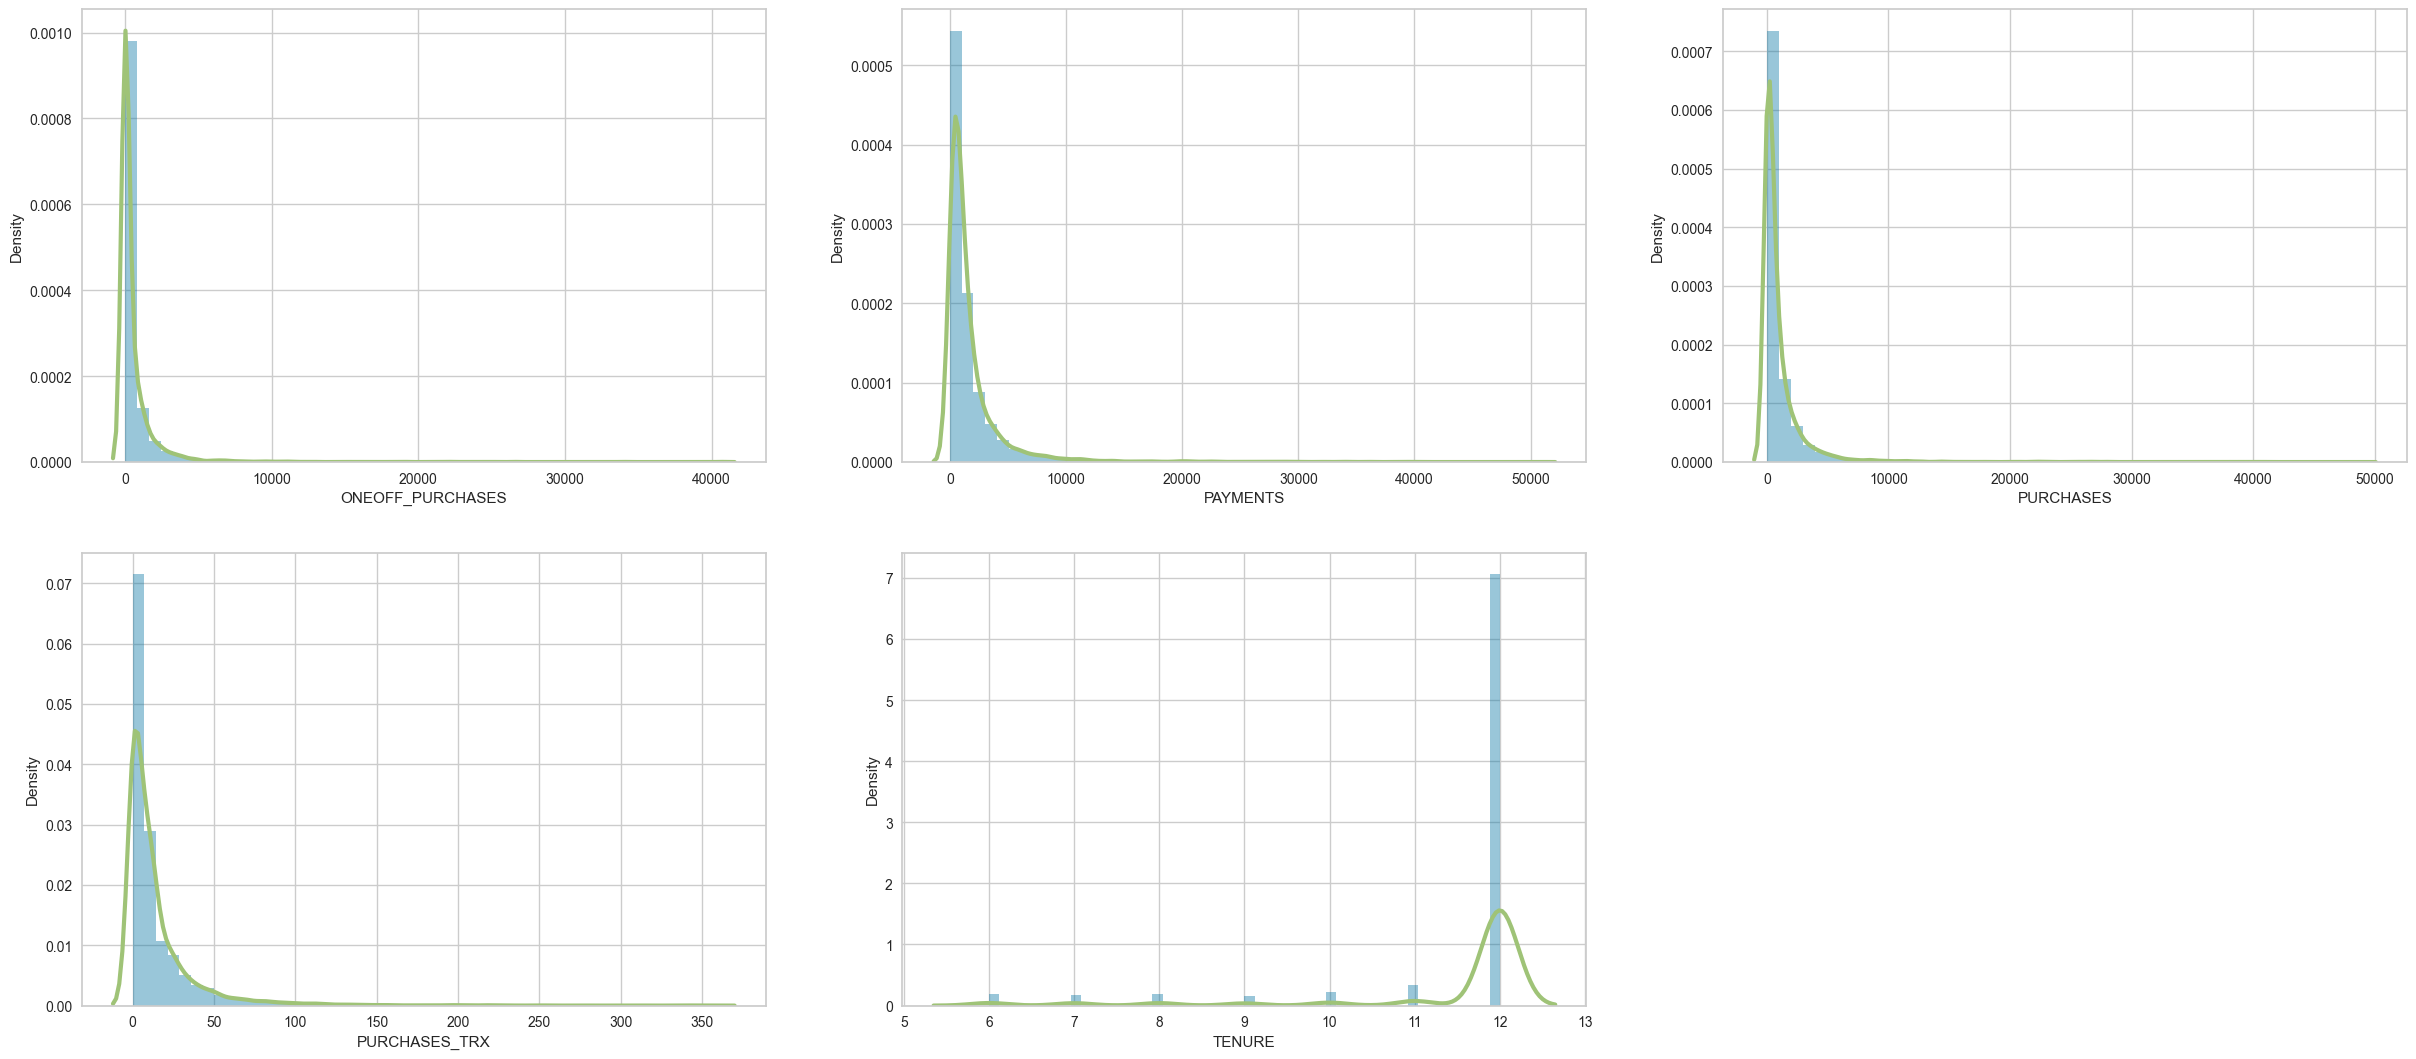

In [366]:
plt.figure(figsize=(30,20))

for i, col in enumerate(data.columns.difference(frequance_columns)[6:]):
        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

<li>Изглежда, че картоносителите са отдавнашни клиенти ( TENTURE) </li>

Нека да разгледаме корелацията между колоните

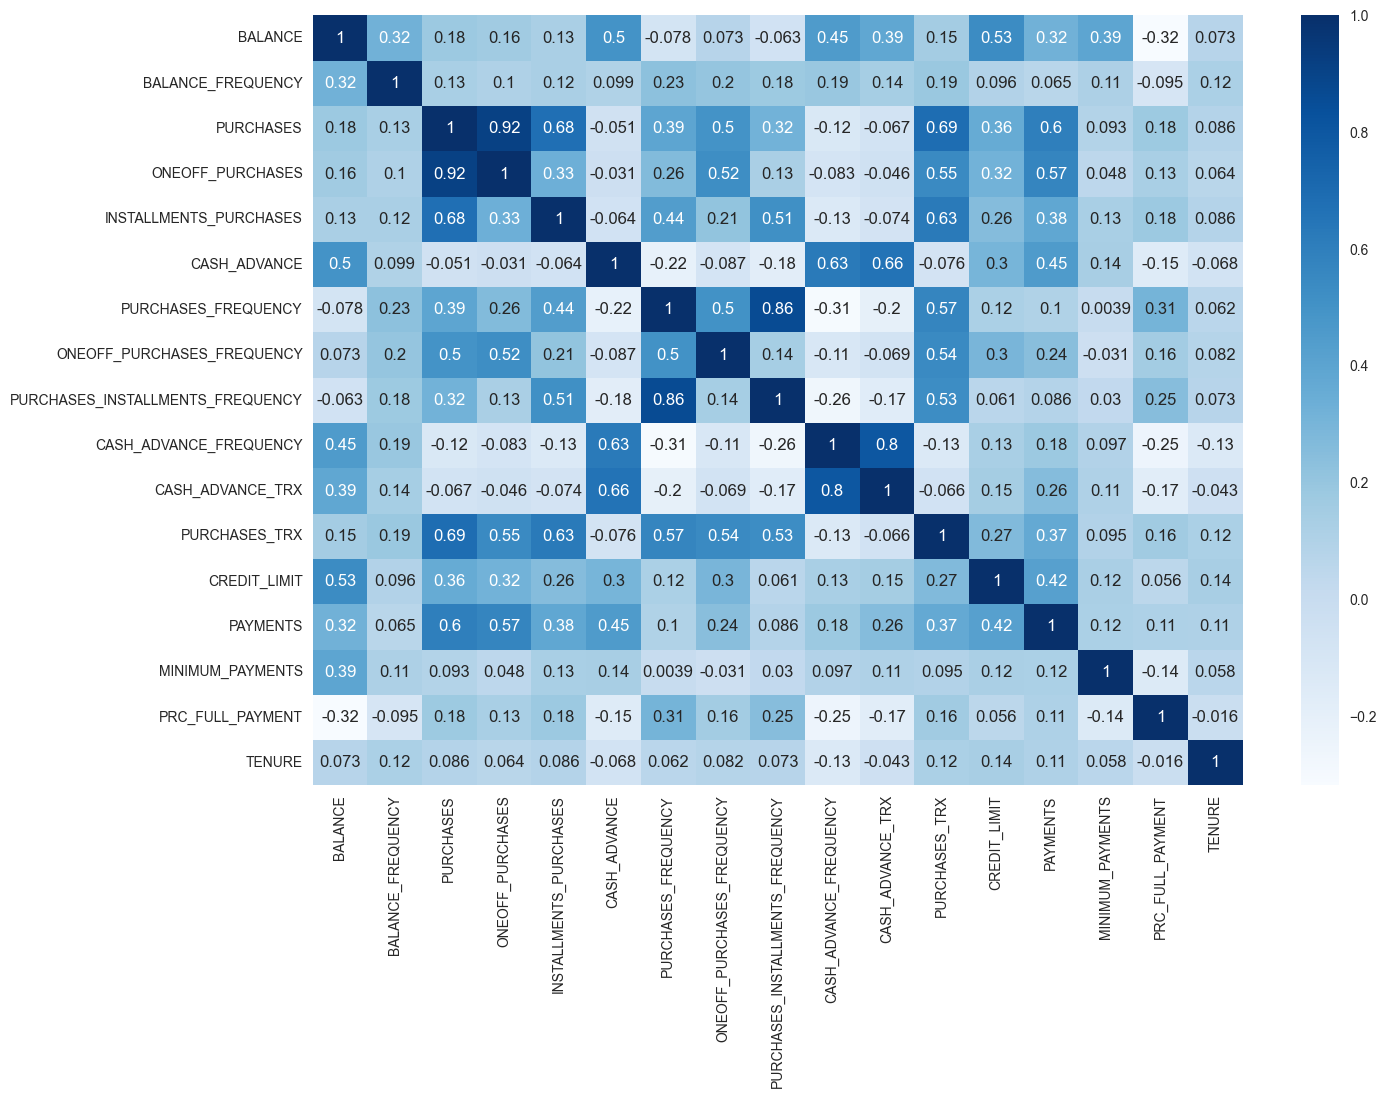

In [367]:
plt.figure(figsize=(15,10))
sns.heatmap( data.corr(), annot=True, cmap='Blues');

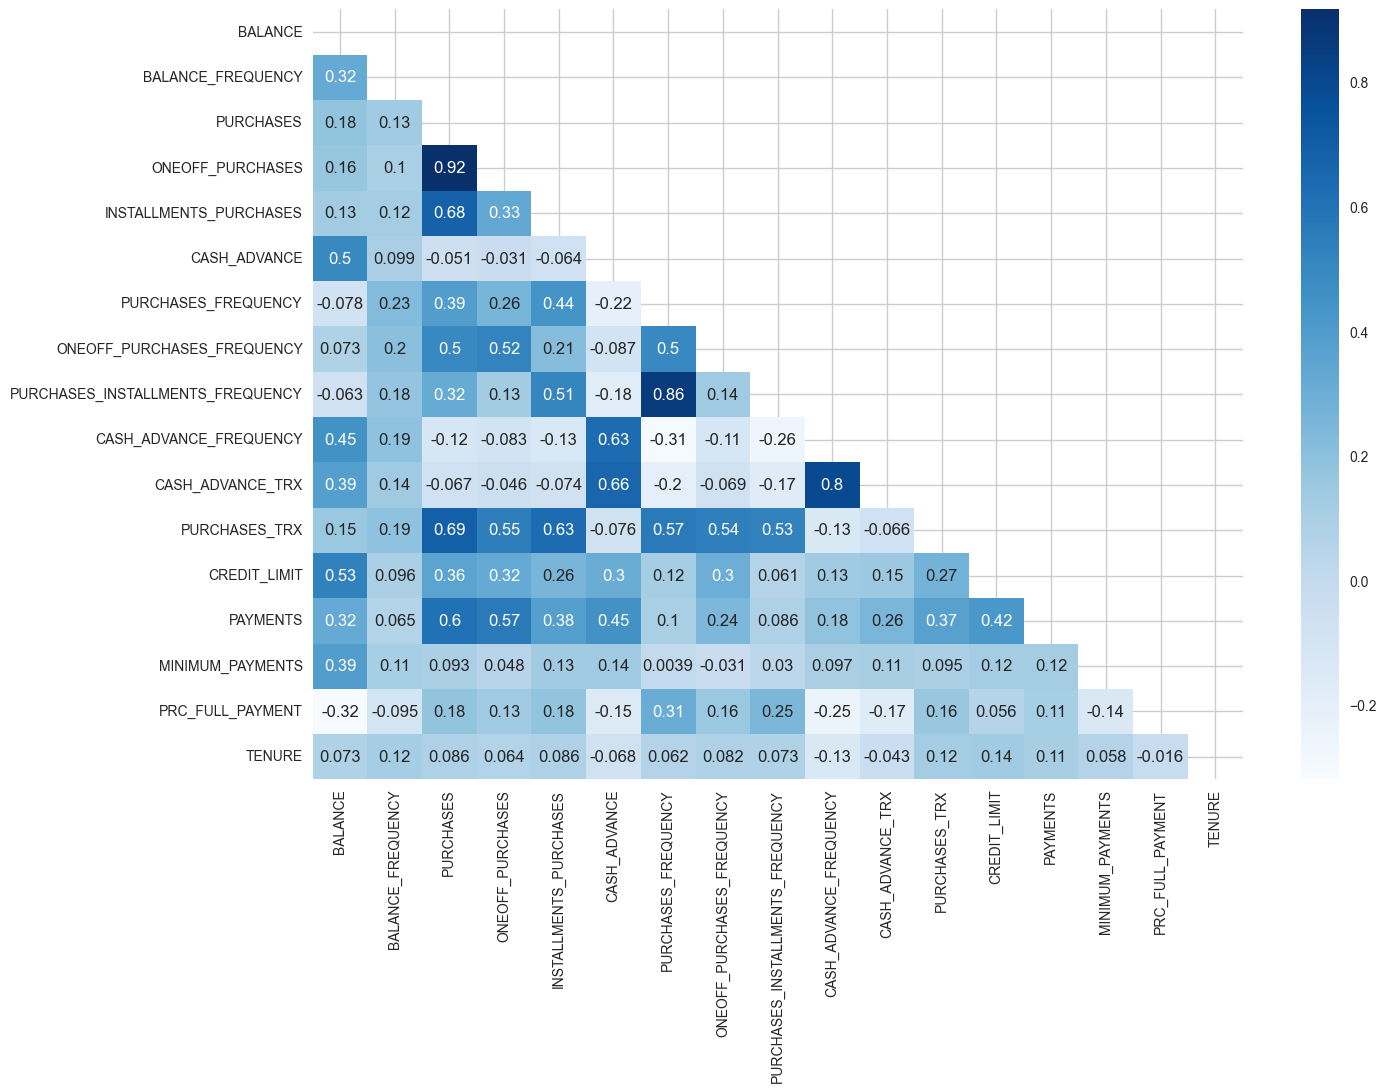

In [368]:
plt.figure(figsize=(15,10))
mask_ = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap( data.corr(), annot=True, cmap='Blues', mask=mask_);

<li>Имаме доста корелирали колони , което е очаквано поради това че много от колоните са репрезинтирани с честотни такива и там със сигурност има линейна зависимост.</li>

<li>Ще се опитаме да решим този проблем като използваме методи за намаляне на размерността (PCA)</li>

    **4.Data Preprocessing**

*4.1 Скалиране*

In [369]:
X = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
X.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean  -2.540488e-17       1.587805e-16  3.175610e-18     -6.033659e-17   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -7.516398e-01      -3.703271e+00 -4.695519e-01     -3.569340e-01   
25%   -6.900078e-01       4.904486e-02 -4.510006e-01     -3.569340e-01   
50%   -3.320286e-01       5.180838e-01 -3.004541e-01     -3.340396e-01   
75%    2.352559e-01       5.180838e-01  5.004652e-02     -9.056763e-03   
max    8.397489e+00       5.180838e-01  2.248351e+01      2.420107e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             3.175610e-17 -6.351220e-18         9.328354e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.545762e-01 -4.667856e-01        -1.221758e+00   
25%             -4.545762e-01 -4.667856e-01        -1.014125e+00   
50%             -3.561562e-01 -4.667856e-01         2.404259e-02   
75%              6.366321e-02  6.435242e-02         1.062211e+00   
max              2.442689e+01  2.201112e+01         1.269843e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.950000e+03                      8.950000e+03   
mean                 1.905366e-17                      5.716098e-17   
std                  1.000056e+00                      1.000056e+00   
min                 -6.786608e-01                     -9.169952e-01   
25%                 -6.786608e-01                     -9.169952e-01   
50%                 -3.993193e-01                     -4.976286e-01   
75%                  3.269728e-01                      9.701506e-01   
max                  2.673451e+00                      1.599199e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.950000e+03      8.950000e+03   8.950000e+03  8.950000e+03   
mean            -1.595744e-16     -1.746585e-17  -1.905366e-17  2.159415e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -6.753489e-01     -4.760698e-01  -5.917959e-01 -1.221484e+00   
25%             -6.753489e-01     -4.760698e-01  -5.515646e-01 -7.954768e-01   
50%             -6.753489e-01     -4.760698e-01  -3.101767e-01 -4.106964e-01   
75%              4.351492e-01      1.100739e-01   9.213645e-02  5.512546e-01   
max              6.820521e+00      1.754785e+01   1.381101e+01  7.010068e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  8.950000e+03      8.950000e+03      8.950000e+03  8.950000e+03  
mean  -2.540488e-17      4.763415e-18     -9.526830e-18  2.921561e-16  
std    1.000056e+00      1.000056e+00      1.000056e+00  1.000056e+00  
min   -5.986883e-01     -3.713599e-01     -5.255510e-01 -4.122768e+00  
25%   -4.662913e-01     -2.983903e-01     -5.255510e-01  3.606795e-01  
50%   -3.026846e-01     -2.323765e-01     -5.255510e-01  3.606795e-01  
75%    5.802976e-02     -7.990728e-03     -3.712234e-02  3.606795e-01  
max    1.692228e+01      3.229156e+01      2.893453e+00  3.606795e-01

*4.2 PCA*

<i>Анализът на главните компоненти (PCA) често се използва при групиране за намаляване на размерността, дори когато намалените измерения все още са по-високи от две или три. Ето някои причини, поради които PCA може да бъде от полза при клъстерирането: </i>

<ol>
<li>
Намаляване на шума: PCA помага за намаляване на шума в данните. Той идентифицира и запазва най-важните компоненти, като същевременно изхвърля по-малко информативните. Това може да подобри поставянето на клъстерите на елементите като се съсредоточи върху техните основни взаими характеристики.
</li>
<li>
Изчислителна ефективност: С голям брой първоначални атрибути , изчислителната сложност на алгоритмите за клъстеризиране може да се увеличи значително. PCA намалява броя на атрибутите, което прави алгоритмите за клъстеризиране по-бързи и по-ефективни.
</li>
<li>
Интерпретируемост: По-малкото измерения улесняват тълкуването на резултатите. По-лесно е да се изобразят разликите и връзките между клъстерите, когато се работи с намален набор от атрибути.
</li>
<li>
Подобрено разделяне на клъстерите: Като се фокусира върху най-информативните компоненти, PCA може да подобри разделянето между клъстерите. Това е особено полезно, когато клъстерите не са добре разделени в началното пространство.
</li>
<li>
Премахване на излишъка: Ако някои от нашите начални атрибута са силно корелирани (излишни) (както е в нашият случай), PCA може да помогне при идентифицирането и премахването на този излишък, което води до по-сбито представяне на данните.
</li>
</ol>

In [370]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca= pca.fit_transform(X)
X_pca.shape #използваме PCA Със размер всичките характеристики

(8950, 17)

<li>Но нека проверим , кой е най-добрият размер на измеренията за PCA</li>

In [371]:
data_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
data_pca.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.681880 -1.077179  0.487644  0.665345  0.016813  0.050060  0.829796   
1 -1.139188  2.505970  0.601594 -0.118455  0.607721 -1.136004 -0.374558   
2  0.969830 -0.383197  0.100972  1.207554 -2.174175 -0.220392 -1.572390   
3 -0.864761  0.067383  1.423558  1.216201  0.360342 -0.081831 -0.309569   
4 -1.599232 -0.689287  0.363848  0.989146 -0.489168  0.073586  0.708883   
5  0.250942 -0.781629 -1.134289  0.832385  0.813617  0.377349  0.796948   
6  6.353444 -0.689639  2.083621 -0.810941 -1.091527 -1.013956 -1.407373   
7  0.277473 -1.290837 -1.828506  0.204520  0.167827 -0.076902  0.420467   
8 -0.441550 -0.462009  0.189538  1.016072 -0.271352 -0.307107 -0.083133   
9 -0.562269 -0.366415  1.951562  0.977805  0.362234 -0.654983 -0.770015   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.040504  0.115534 -0.078417 -0.234852 -0.053760 -0.080529 -0.187085   
1  0.131076  0.687374 -0.778476 -0.871441 -0.600468 -0.039971 -0.737023   
2 -0.171515 -0.882822 -0.001107 -0.761611  0.683401  0.696929  0.042132   
3 -0.471327 -0.185173  0.391932  0.741904  0.173217 -0.176386 -0.428263   
4  0.205079  0.585773 -0.122610 -0.454851 -0.106088 -0.038756 -0.040661   
5  0.035093  0.465478 -0.210586 -0.201452  0.339434  0.491854 -0.074759   
6  1.133387  0.283632 -0.087796  1.219341  0.020477 -0.824933 -0.197367   
7 -0.530770  0.108698 -0.963535  0.532294 -0.065314  0.263502  0.072218   
8 -0.463737  0.697099 -0.094926  0.210407  0.426647 -0.502295 -0.241928   
9 -1.068057 -0.330358  0.267172  0.477917  0.772940 -0.765286 -0.297869   

       PC15      PC16          PC17  
0  0.151470  0.048520 -1.611892e-04  
1 -0.531896 -0.082881  3.003052e-06  
2  0.222586  0.511495  2.173081e-05  
3 -0.115390 -0.021290  4.958238e-07  
4  0.290388 -0.070585 -8.135921e-05  
5  0.170264  0.130701 -3.464747e-04  
6 -0.260685 -0.811676  3.991059e-04  
7  0.151648  0.047873 -1.526910e-04  
8  0.126913  0.004907 -9.915653e-05  
9 -0.059197  0.057169 -7.112018e-05

<li>За да преценим , кое е най-доброто измерение ще използваме тъй нареченето : "explained variance ratio"</li>

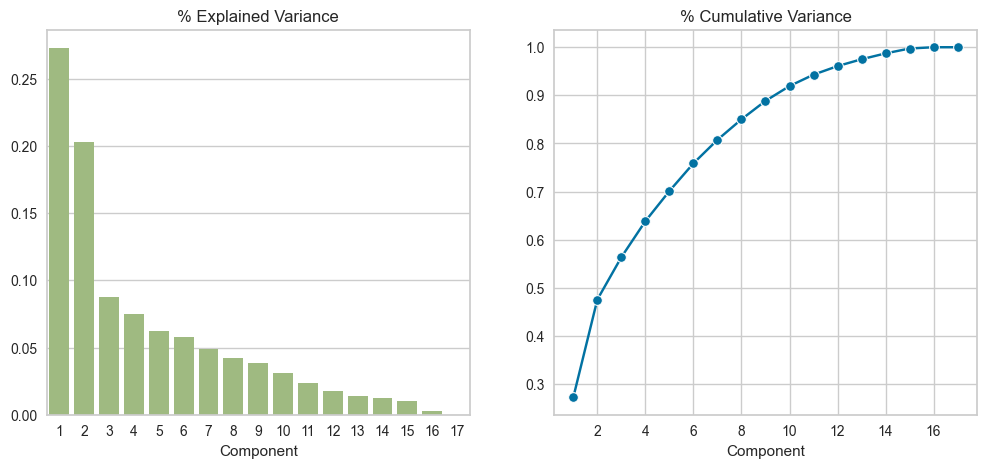

In [372]:
explained_vr = list(pca.explained_variance_ratio_)
explained_vr = sorted(explained_vr,reverse=True)
explained_vr_cum_sum= list(pca.explained_variance_ratio_.cumsum())
nums_components = [ z + 1 for z in range(X_pca.shape[1])]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = nums_components, y = explained_vr, ax = ax[0] , color='g')
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = nums_components, y = explained_vr_cum_sum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

<li>Търсим най-малък брой измерения с най-голям explainded variance . Изглежда n=7 е такова число , като също така има и голяма комулативна дисперсия . Тоест взима 7те най- значещи компоненти , които събират информация за дисперсията от около 80% от оригиналното множество.</li>

In [373]:
X_pca_7 = PCA(n_components=7, random_state= 619).fit_transform(X)
X_pca_7 = pd.DataFrame(X_pca_7, columns=[f'PC{i+1}' for i in range(X_pca_7.shape[1])])
X_pca_7

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    -1.681880 -1.077179  0.487644  0.665345  0.016813  0.050060  0.829796
1    -1.139188  2.505970  0.601594 -0.118455  0.607721 -1.136004 -0.374558
2     0.969830 -0.383197  0.100972  1.207554 -2.174175 -0.220392 -1.572390
3    -0.864761  0.067383  1.423558  1.216201  0.360342 -0.081831 -0.309569
4    -1.599232 -0.689287  0.363848  0.989146 -0.489168  0.073586  0.708883
...        ...       ...       ...       ...       ...       ...       ...
8945 -0.358980 -2.016388 -0.989239 -2.729895  0.266396  2.672446 -1.524451
8946 -0.490968 -1.437382 -1.560044 -1.371444  0.708646  3.720954 -1.322826
8947 -0.925647 -1.811290 -0.469902 -2.281150  0.384258  2.976699 -1.370738
8948 -2.336381 -0.658958  0.978753 -1.858879  0.067536  3.173733 -0.931459
8949 -0.556262 -0.400558  1.019728 -1.950520 -1.244390  3.752409 -1.416001

[8950 rows x 7 columns]

<li>Но за целите на визуализацията ще тестваме с pca = 2</li>

In [374]:
X_pca_2 = PCA(n_components=2, random_state= 619).fit_transform(X)
X_pca_2 = pd.DataFrame(X_pca_2, columns=[f'PC{i+1}' for i in range(X_pca_2.shape[1])])
X_pca_2

PC1       PC2
0    -1.681880 -1.077185
1    -1.139189  2.505944
2     0.969824 -0.383208
3    -0.864765  0.067362
4    -1.599230 -0.689286
...        ...       ...
8945 -0.358979 -2.016390
8946 -0.490966 -1.437371
8947 -0.925645 -1.811291
8948 -2.336375 -0.658932
8949 -0.556259 -0.400527

[8950 rows x 2 columns]

In [375]:
X_pca_3 = PCA(n_components=3, random_state= 619).fit_transform(X)
X_pca_3 = pd.DataFrame(X_pca_3, columns=[f'PC{i+1}' for i in range(X_pca_3.shape[1])])
X_pca_3

PC1       PC2       PC3
0    -1.681881 -1.077183  0.487610
1    -1.139185  2.505983  0.601984
2     0.969831 -0.383194  0.101102
3    -0.864761  0.067381  1.423610
4    -1.599232 -0.689293  0.363756
...        ...       ...       ...
8945 -0.358982 -2.016400 -0.989476
8946 -0.490970 -1.437399 -1.560395
8947 -0.925648 -1.811303 -0.470157
8948 -2.336383 -0.658967  0.978501
8949 -0.556261 -0.400545  1.019838

[8950 rows x 3 columns]

**5.Клъстеризация**

*5.1 Kmeans*

In [376]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [377]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

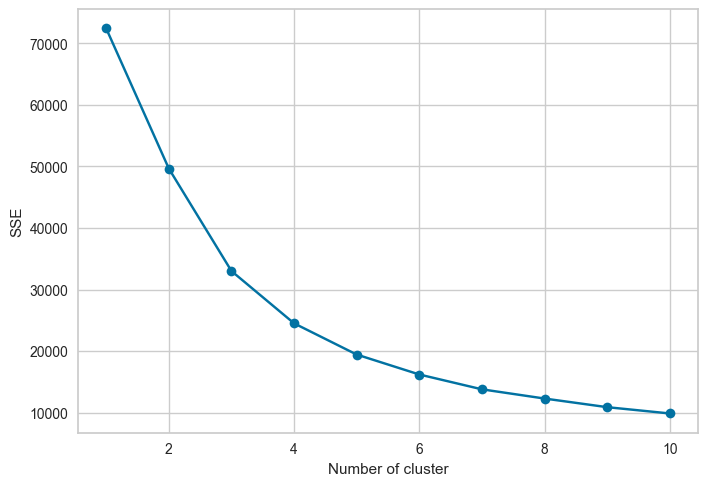

In [378]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmeans= KMeans(n_cluster, random_state=619)

    kmeans.fit(X_pca_2)

    inertias.append(kmeans.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

<li>Изглежда че по метода на лакътя k=4 е най-добрият брой клъстери , които можем да вземем за Kmeans</li>

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

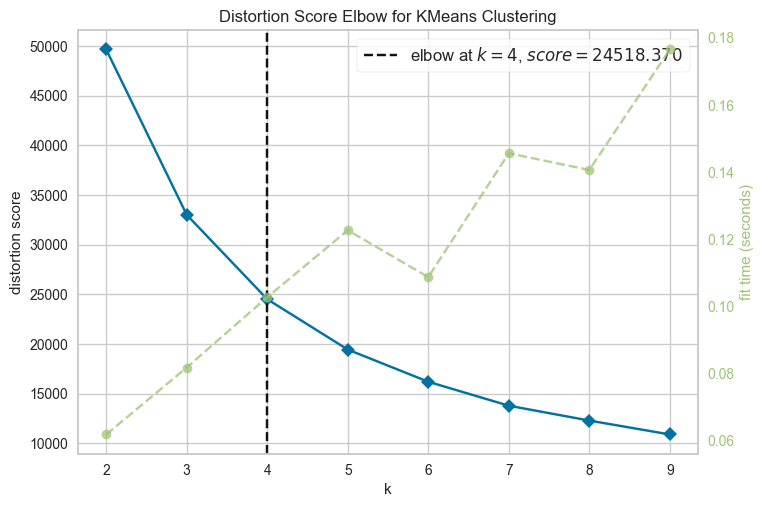

In [379]:
visualizer = KElbowVisualizer(KMeans(random_state=619), k=(2,10), metric='distortion')

visualizer.fit(X_pca_2) 
visualizer.finalize()      
visualizer.show();

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

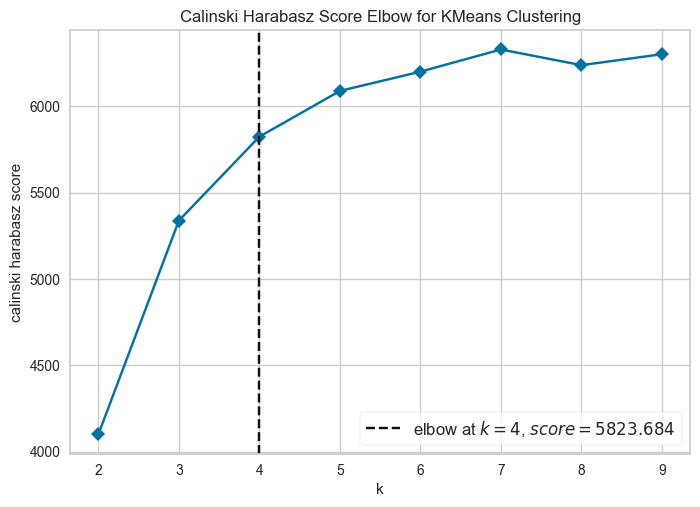

In [380]:
visualizer = KElbowVisualizer(KMeans(n_clusters=4,random_state=619), k=(2,10), metric='calinski_harabasz' , timings=False)

visualizer.fit(X_pca_2) 
visualizer.finalize()      
visualizer.show();


c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

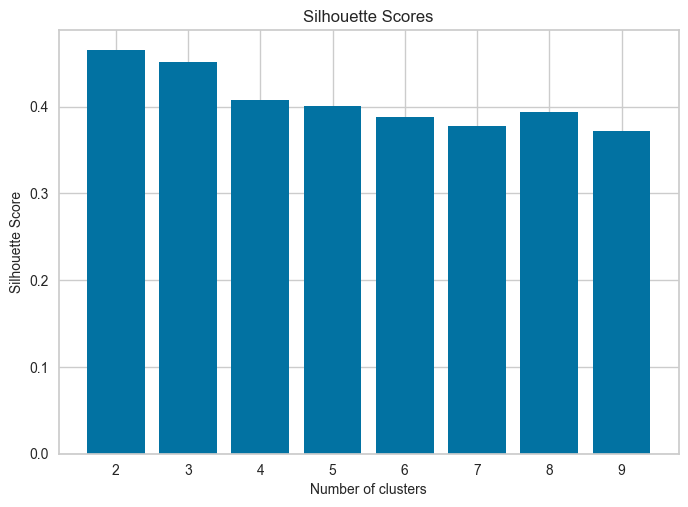

In [381]:
silhouette_scores = [] 

for n_cluster in range(2 , 10):

  kmeans = KMeans(n_cluster, random_state=619)

  labels = kmeans.fit_predict(X_pca_2)

  silhouette_scores.append(silhouette_score(X_pca_2, labels))
    
plt.bar(range(2 , 10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()


c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



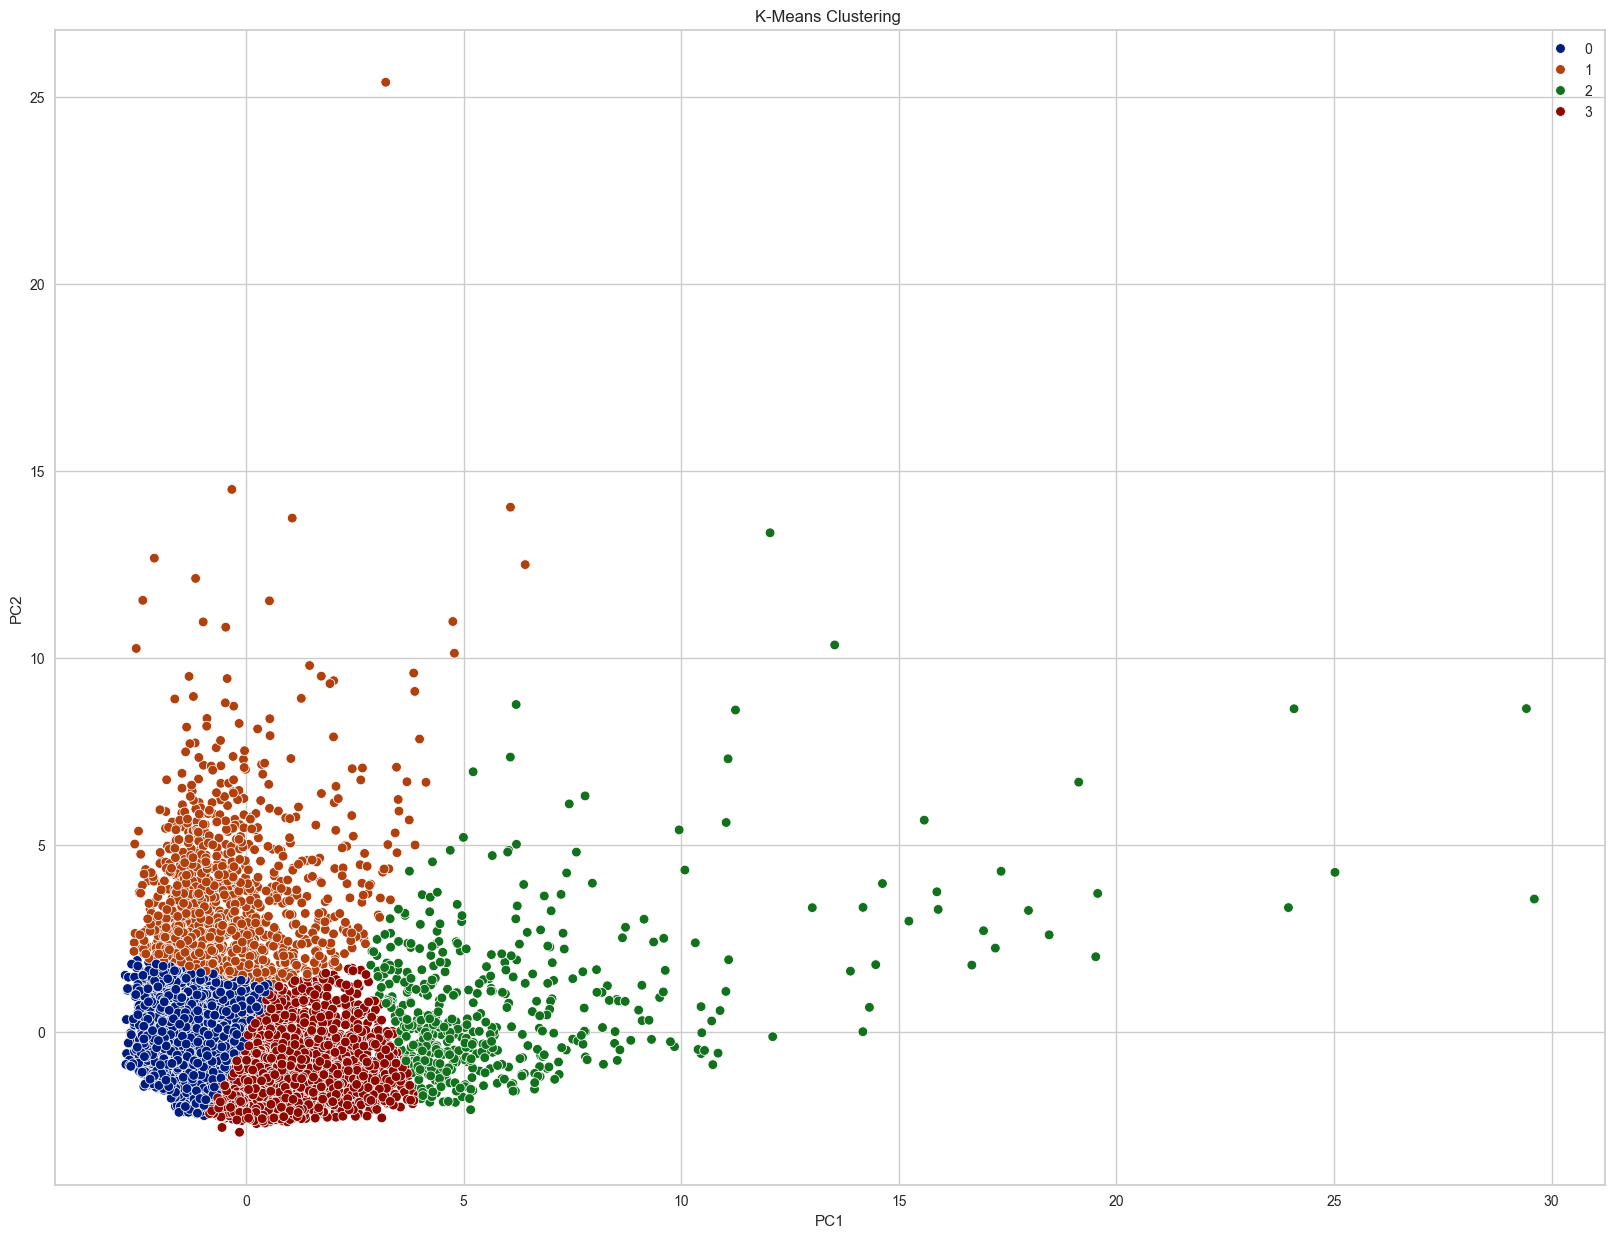

In [382]:
kmeans = KMeans(n_clusters = 4, random_state=619)

labels = kmeans.fit_predict(X_pca_2)

plt.figure(figsize=(20,15))

ax = sns.scatterplot(x= X_pca_2["PC1"], y= X_pca_2["PC2"], hue = labels, data = X_pca_2, palette='dark')
plt.title('K-Means Clustering ')
plt.show()

In [383]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [384]:
import plotly.express as px

kmeans = KMeans(n_clusters = 4, random_state=619)

labels = kmeans.fit_predict(X_pca_3)

plt.figure(figsize=(20,15))
fig = px.scatter_3d( X_pca_3, x= X_pca_3["PC1"], y= X_pca_3["PC2"], z = X_pca_3["PC3"] , color = labels);
fig.show();

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Figure size 2000x1500 with 0 Axes>

In [385]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    scores = []
    scores.append(db_index)
    scores.append(s_score)
    scores.append(ch_index) 
    return scores

kmeans = KMeans(n_clusters = 4, random_state=619)

labels = kmeans.fit_predict(X_pca_2)

kmeans_scores = evaluate_clustering(X_pca_2, labels)

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



*5.2 DBSCAN Clustering*

<li>Трябва да изберем подходящо eps за DBSCAN. Правим го с silhouette_score </li>

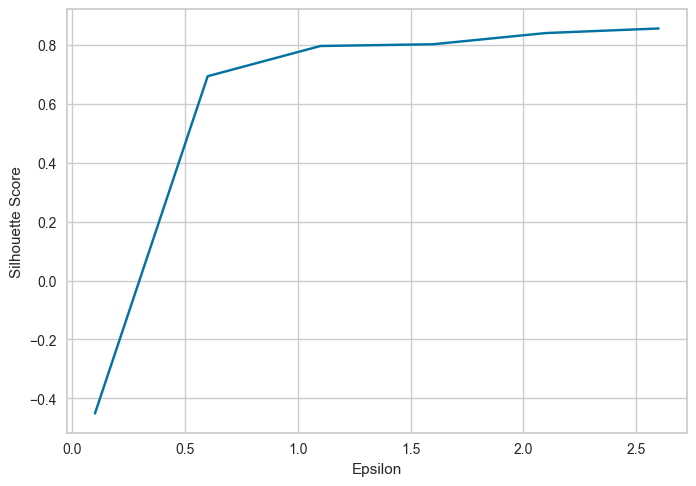

In [386]:
from sklearn.cluster import DBSCAN
silhouette_scores = []

step = 0.5
for epsilon in np.arange(0.1, 3, step):
    dbscan = DBSCAN(eps=epsilon)
    labels = dbscan.fit_predict(X_pca_2)
    silhouette_scores.append(silhouette_score(X_pca_2, labels))

plt.plot(np.arange(0.1, 3, step), silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

<li>Изглежда, че eps = 1.5 е подходящо. Понеже има досстатъчно висок silhouette_score , както и след него няма коренна разлика </li>

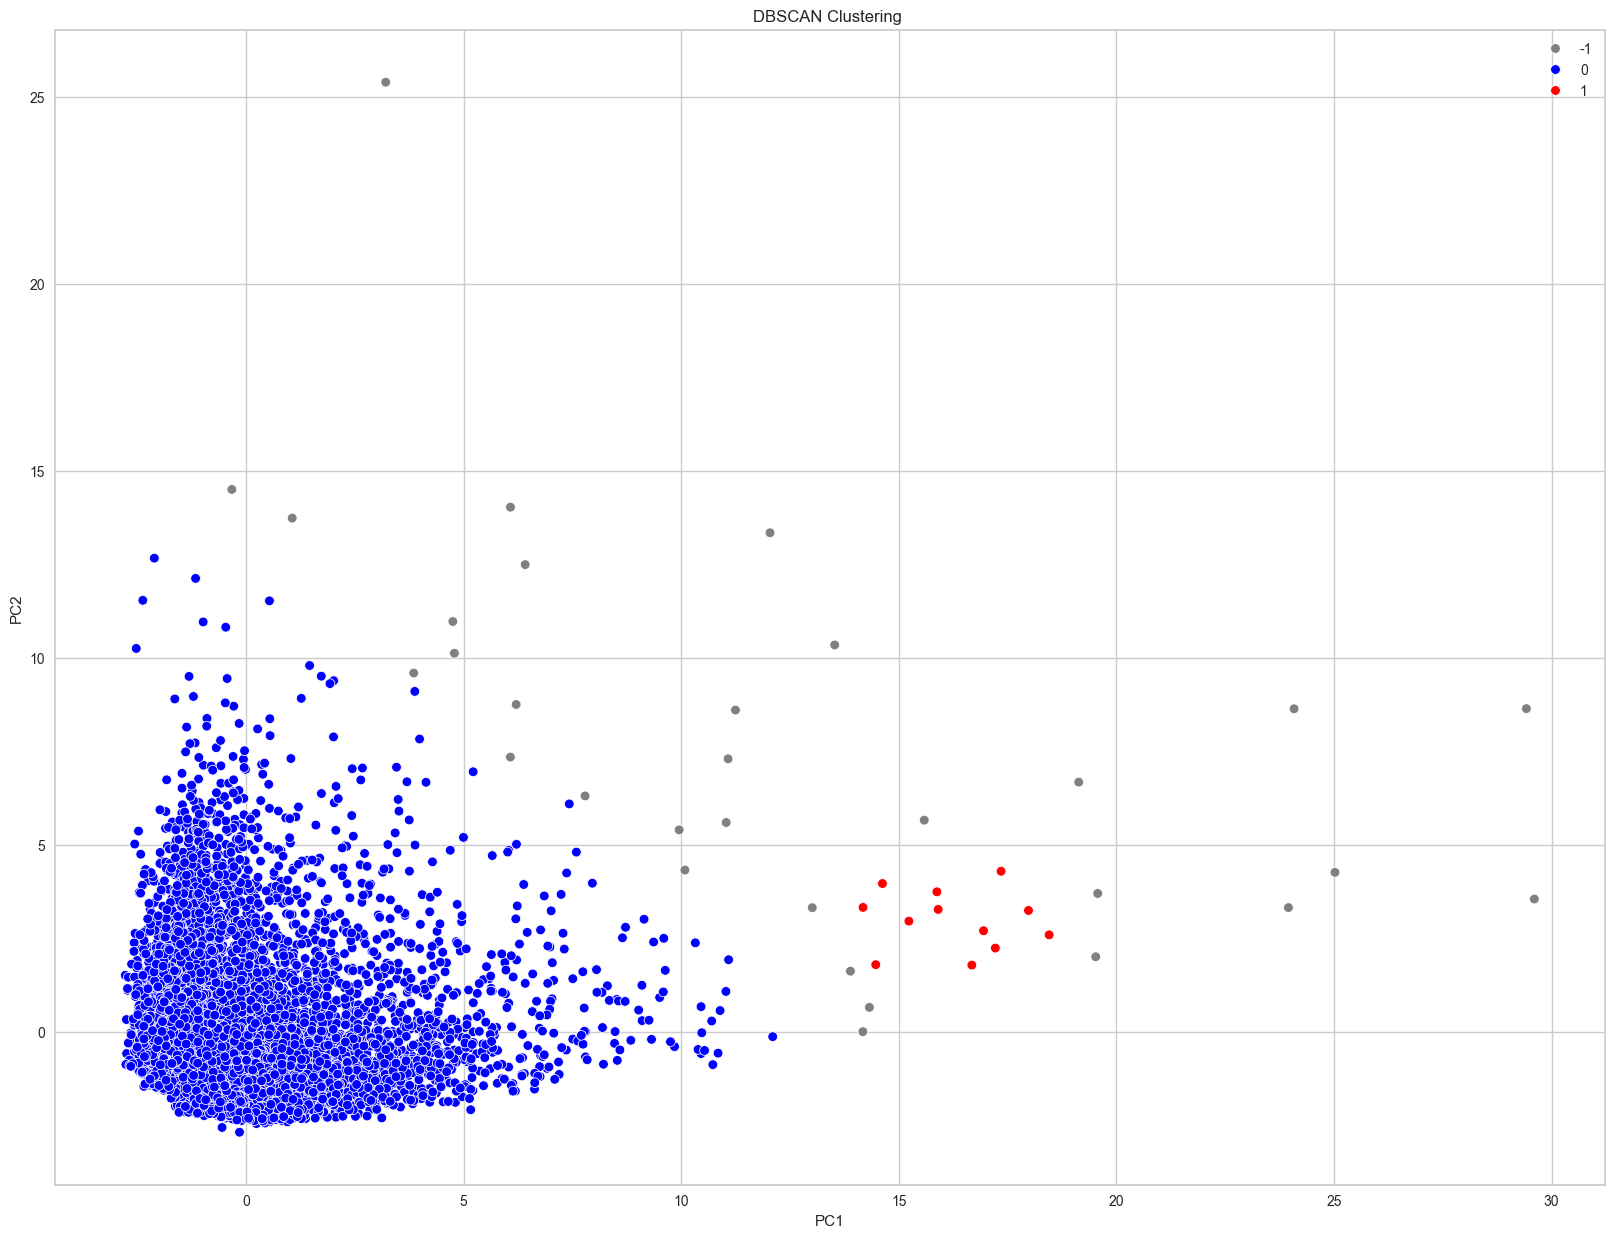

In [387]:
dbscan =DBSCAN(eps=1.5)
labels= dbscan.fit_predict(X_pca_2)

plt.figure(figsize=(20,15))

palette = ["gray", "blue", "red"]

# Class -1 is considered as outlier
ax = sns.scatterplot(x= X_pca_2["PC1"], y= X_pca_2["PC2"], hue = labels, data = X_pca_2, palette=palette)
plt.title('DBSCAN Clustering ')
plt.show()

In [390]:

dbscan = DBSCAN(eps=1.5)
labels= dbscan.fit_predict(X_pca_2)

dbscan_scores = evaluate_clustering(X_pca_2, labels)

*5.3 Hierarchical Clustering (Agglomerative) Clustering*

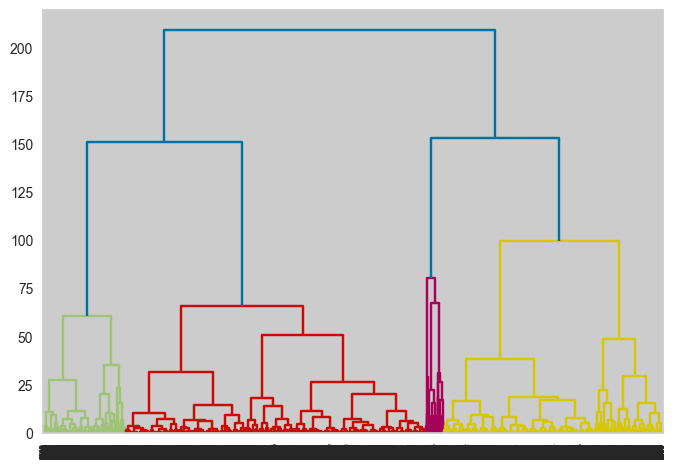

In [393]:
import sys
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram



mergings_c = linkage(X_pca_2, method="ward", metric='euclidean')
dendrogram(mergings_c)
plt.show() # it could take some time (around 2 min)

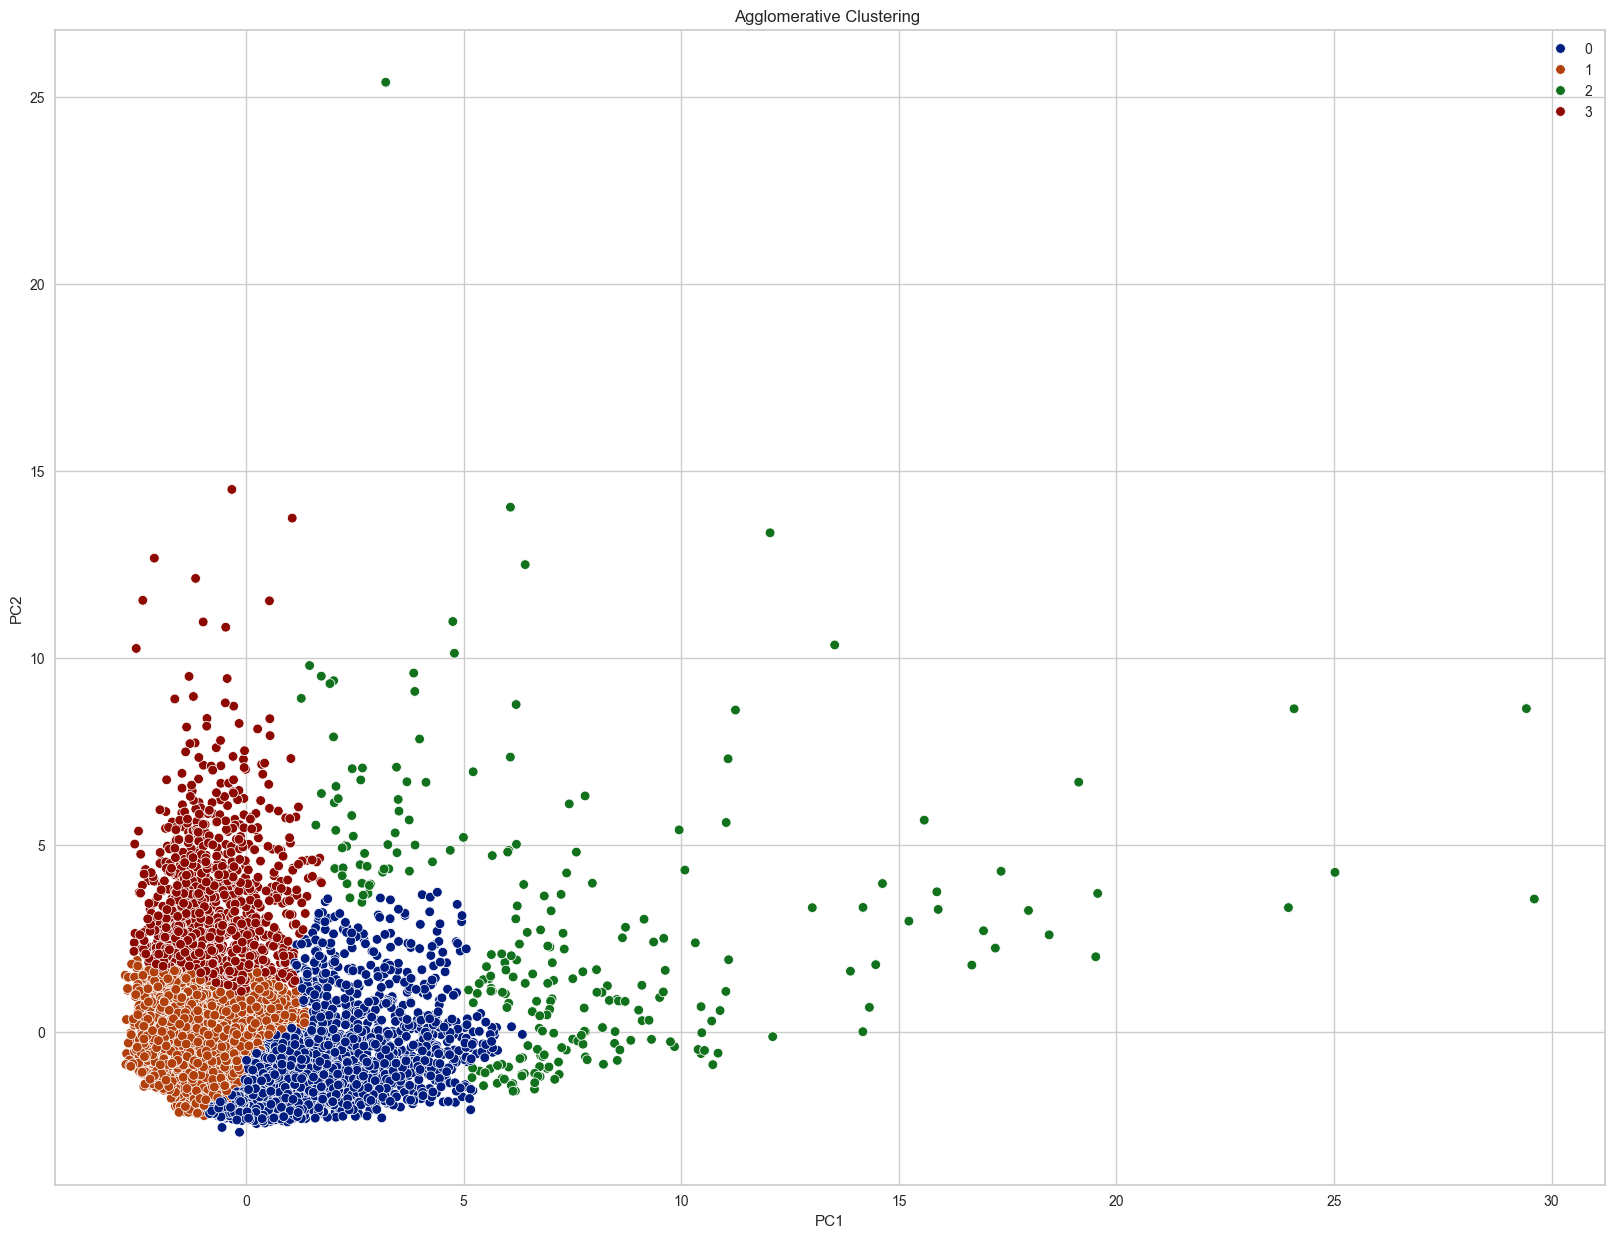

In [394]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=4)
labels= agglomerative.fit_predict(X_pca_2)

plt.figure(figsize=(20,15))

ax = sns.scatterplot(x= X_pca_2["PC1"], y= X_pca_2["PC2"], hue = labels, data = X_pca_2, palette='dark')
plt.title('Agglomerative Clustering ')
plt.show()

In [397]:
agglomerative = AgglomerativeClustering(n_clusters=4)
labels= agglomerative.fit_predict(X_pca_3)

plt.figure(figsize=(20,15))
fig = px.scatter_3d( X_pca_3, x= X_pca_3["PC1"], y= X_pca_3["PC2"], z = X_pca_3["PC3"] , color = labels)
fig.show();

<Figure size 2000x1500 with 0 Axes>

In [400]:
agglo_scores= evaluate_clustering(X_pca_2,labels)

print("{} \n {} \n {} \n".format(kmeans_scores,dbscan_scores,agglo_scores))


[0.801, 0.408, 5823.684] 
 [1.305, 0.801, 724.604] 
 [0.914, 0.266, 4007.445] 



**6.Оценяване на моделите**

In [406]:
final_results = pd.DataFrame( {
        'metric' : ['distortion' , 'silhouette', 'calinski_harabasz' ],
        'kmeans' : kmeans_scores,
        'dbscan' : dbscan_scores,
        'agglomerative' : agglo_scores,
})
final_results

metric    kmeans   dbscan  agglomerative
0         distortion     0.801    1.305          0.914
1         silhouette     0.408    0.801          0.266
2  calinski_harabasz  5823.684  724.604       4007.445

<i>Спрямо резултатите виждаме , че спрямо distortion , kMeans бие другите по-резултат защото има най- малък резултат , а distortion е такава метрика при , която колкото по-малък резултат имаме, означава че клъстерите са разделени относително добре и няма голямо количество на презастъпване ( overlapping ). </i>

<i>Спрямо silhouette , dbscan бие другите по-резултат защото има най- висок резултат , а silhouette е такава метрика при , която колкото по-голям резултат имаме, означава че средно отношението на всяка една точка спрямо своя клъстер и външните клъстери е толкова по-голямо, а ние точно това търсим. Хубаво разделяне на клъстерите. </i>


<i>Спрямо calinski_harabasz , kmeans отново бие другите по-резултат защото има най- висок резултат , а calinski_harabasz е такава метрика ,при  която колкото по-голям резултат имаме, означава че клъстерите са се разделили възможно по-добре </i>

**Като заключение можем да кажем , че kMeans се справя най-добре и това е алгоритъма , който ще изберем**  :)

**7.Категоризация**

c:\Users\Vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Vladi\AppData\Local\Temp\ipykernel_15044\3911724821.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Vladi\AppData\Local\Temp\ipykernel_15044\3911724821.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Vladi\AppData\Local\Temp\ipykernel_15044\3911724821.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

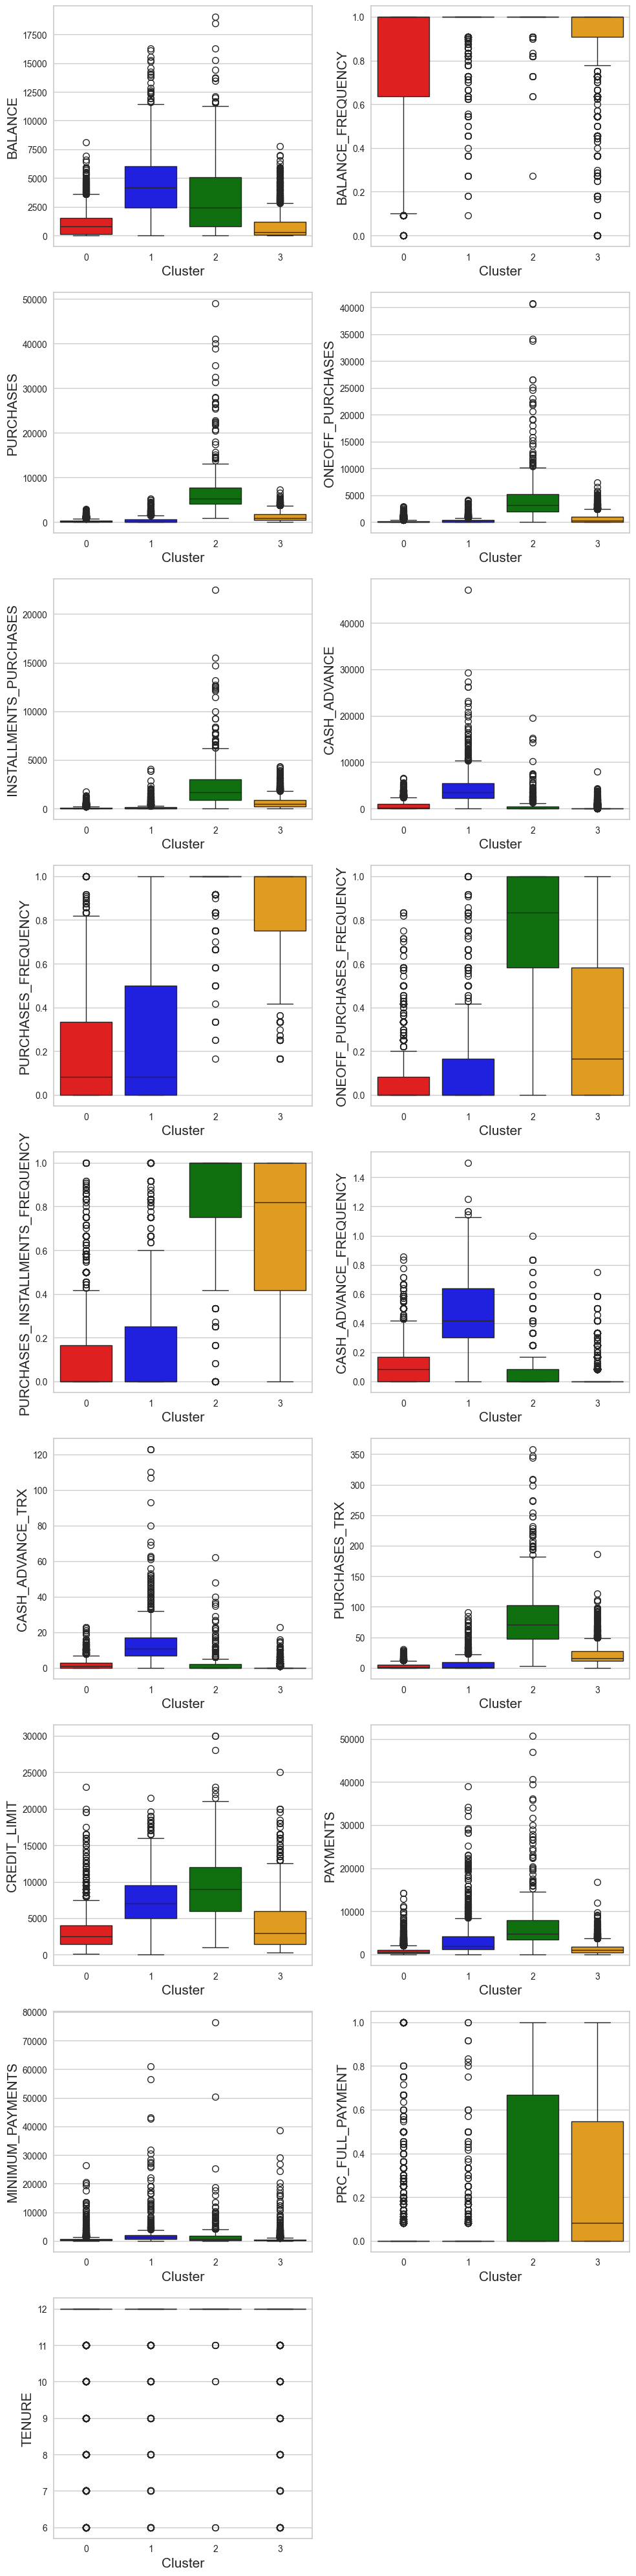

In [453]:
clusters=kmeans.fit_predict(X_pca_2)
data['Cluster']= clusters

plt.figure(figsize = (10, 40))
for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(9, 2, i+1)
    sns.boxplot(x = data['Cluster'], y = data[col],palette=['red','blue','green','orange'])
    plt.xlabel("Cluster", fontsize = 15)
    plt.ylabel(col, fontsize = 15)


plt.tight_layout()
plt.show()

**Разделяме нашите потребители на 4ри групи**
<ul>
<li>
    Категория 0. <br/> Имат сравнително нисък баланс, правят много ниски минимални плащания, но сравнително често използват своята карта. (<i>students credit card holders</i>)
</li>
<li>
    Категория 1. <br/> Имат най-голям баланс, те са хората които най-често плащат в аванс (cash_advance),  имат сравнитлно висок кредитен лимит. (<i>cash_advance credit card holders</i>)
</li>
<li>
    Категория 2. <br/> Имат сравнително висок баланс, правят най-скъпите плащания, както и най-скъпите еднократни плащания, имат най-голям кредитен лимит. Както и правят installments payments най-често и най - мноого (<i>installments credit card holders</i>)
</li>
<li>
    Категория 3. <br/> Имат нисък баланс , пазаруват често на изплащане , но и правят най-големите цели плащания  (<i>full payers credit card holders</i>)
</li>
</ul>

**8. Заключение и бъдещо развитие**

<i>Като заключение от тестванията можем да кажем , че kMeans се справи най-добре от тестваните алгоритми като ни категоризира носителите на кредитни карти в 4 категории (students, cash_advance credit card holders, installments credit card holders, full payers card holders) , оценихме нашите алгоритми с 3 метрики (distortion, silhouette, calinski_harabasz) </i>

<i>Като бъдещо развитие:
    <ul>
    <li>
        Може да се измисли по-добро справяне с outlier-ите отколкото сега , така че да се изчисляват спрямо някакви закономерностти.
    </li>
    <li>
        Може да се пробва да се намали размерността до n=7 с pca и след това да се използва tsne за намаляне до n=2 и да се проверят резултатите.
    </li>
    <li>
    Да се използват Agglomerative/DBSCAN с параметър матрица на разстоянията на Gower (метрика подходяща за числовите характеристики)
    </li>
    </ul>
</i>